## Gather

In [1]:
import pandas as pd
import numpy as np

In [9]:
# Importing data from csv file
arch = pd.read_csv('twitter-archive-enhanced.csv')

# Check if the file was imported correctly
arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
# Downloading image file from Udacity's server programatically using requests library
import requests

i = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

# open('google.ico', 'wb').write(r.content)
open('image-predictions.tsv', 'wb').write(i.content)

335079

In [11]:
# Importing data from tsv file
images = pd.read_csv('image-predictions.tsv', sep='\t')

In [12]:
# Check if the file was imported correctly
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [13]:
# Read json.text file into a list
import json

tweets = []
tweet_json = open('tweet-json.txt', "r")
for line in tweet_json:
    try:
        tw = json.loads(line)
        tweets.append(tw)
    except:
        continue
tweet_json.close()

In [14]:
# Create a DF only with columns: 'id', 'retweet_count', 'favorite_count'
tweets_df = pd.DataFrame()
tweets_df['id'] = list(map(lambda tw: tw['id'], tweets))
tweets_df['retweet_count'] = list(map(lambda tw: tw['retweet_count'], tweets))
tweets_df['favorite_count'] = list(map(lambda tw: tw['favorite_count'], tweets))

In [15]:
tweets_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## ASSESS

### Exploratory Analysis of: "Enhanced Twitter Archive" - `arch` table

 ###### Data Overview:
 
 The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).

I extracted this data programmatically, but I didn't do a very good job. The ratings probably aren't all correct. Same goes for the dog names and probably dog stages (see below for more information on these) too. You'll need to assess and clean these columns if you want to use them for analysis and visualization.
 
 ###### After doing some visual assessment:
 - 'in_reply_to_status_id' and 'in_reply_to_user_id' columns have a lot of missing values
 - The 'text' column has comments from the admins about unqualified content: "We only rate dogs. Please don't send in..." or "We don't rate penguins..."
 - Missing values and "None" strings in: 'doggo', 'floofer', 'pupper' and 'puppo'. Do I need to extract them from the 'text' column as suggested in the introduction?
 - Column 'rating_numerator' has unsually high numbers for some entries: 420, 666.
 - Column 'name' has "None" as a name for some of the entries - missing values
 

In [16]:
# Need to convert DF to Excel for visual assessment
# DF TO EXCEL
from pandas import ExcelWriter

writer = ExcelWriter('Archive.xlsx')
arch.to_excel(writer)
writer.save()

In [17]:
arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

 ###### After doing some programmatic assessment:
 - In addition'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' and 'expanded_urls' columns have a lot of missing values
 - Columns: 'doggo', 'floofer', 'pupper' and 'puppo' null values are prepresented as strings

### Exploratory Analysis of: "Image Predictions File" -  `images` table

In [18]:
# Need to convert DF to Excel for visual assessment
# DF TO EXCEL

writer = ExcelWriter('DogImages.xlsx')
images.to_excel(writer)
writer.save()


###### Data Overview:

The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
- p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
- p1_conf is how confident the algorithm is in its #1 prediction → 95%
- p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
- p2 is the algorithm's second most likely prediction → Labrador retriever
- p2_conf is how confident the algorithm is in its #2 prediction → 1%
- p2_dog is whether or not the #2 prediction is a breed of dog → TRUE
- etc.
 
##### After doing some visual assessment:
 - Do we need columns beyond 'p1_dog' with a lesser confidence?
 - Do we need columns: 'jpg-url' and 'img_num'?
 - Names of breeds: some begin capital letters, some with small
 - Many names include "_"
 

In [19]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


 ###### After doing some programmatic assessment:
 - No missing values
 - Should the values in 'p1_conf 2075 non-null float64' be converted to int - intergers?

### Exploratory Analysis of: "Tweets" -  `tweets_df` table

In [20]:
# Need to convert DF to Excel for visual assessment
# DF TO EXCEL

writer = ExcelWriter('Tweets.xlsx')
tweets_df.to_excel(writer)
writer.save()

###### Data Overview:

"Then read this tweet_json.txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count."
 
##### After doing some visual assessment:

- What the columns: 'retweet_count' exactly means? How does it relate to the instructions not to use retweets.
- Some tweets have a very high "retweet_count" (37911), but 0 "favorite_count", which is strange
- Some tweets have very low indicators, unusual for most of the data

In [21]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


 ###### After doing some programmatic assessment:
 - No missing values revealed by  the 'info( )', but there're '0' integer values, that can be cosidered as missing values.

## ASSESSMENT SUMMARY

#### Quality
##### `arch` table
- <font color="#007ff">Missing values: 'in_reply_to_status_id', 'in_reply_to_user_id'</font>
- The 'text' column has comments from the admins about unqualified content: "We only rate dogs. Please don't send in..." or "We don't rate penguins..."
- <font color="#007ff">No quality data for our purposes in `in_reply_to_status_id`, `in_reply_to_user_id`, `timestamp`, `retweeted_status_timestamp`, `expanded_urls` and `source`</font>
- Missing values and "None" strings in: 'doggo', 'floofer', 'pupper' and 'puppo'. Do I need to extract them from the 'text' column as suggested in the introduction?
- <font color="#007ff">Duplicates - Retweeted data in coloumns: `retweeted_status_id`, `retweeted_status_user_id`</font>
- <font color="#007ff">The number of rows in all tables differs, this signals duplicated data as well as a case for missing values</font>
- Column 'rating_numerator' has unsually high numbers for some entries: 420, 666.
- Column 'name': has "None" as a name for some of the entries - missing values
- Column 'name': some names begin with small letters, even a single letter "a".


##### `images` table
 - <font color="#007ff">p1_dog: FALSE - means the prediction is not a breed of dog</font>
 - p1: Some breed names begin capital letters, some with small
 - p1: Some are not breed names
 - <font color="#007ff">p1: Many names include "_"</font>
 - p1_conf: different number of decimal points
 

 - <font color="#007ff">p2_dog: FALSE - means the prediction is not a breed of dog</font>
 - <font color="#007ff">p2: Some breed names begin capital letters, some with small</font>
 - <font color="#007ff">p2: Many names include "_"</font>
 - p2: Some are not breed names
 - p2_conf: very large and different number of decimal points

 
 - <font color="#007ff">p3_dog: FALSE - means the prediction is not a breed of dog</font>
 - <font color="#007ff">p3: Some breed names begin capital letters, some with small</font>
 - <font color="#007ff">p3: Many names include "_"</font>
 - p3: Some are not breed names
 - p3_conf: very large and different number of decimal points
 


##### `tweets_df` table

- favorite_count: missing data displayed as interger "0"
- Some tweets have a very high "retweet_count" (37911), but 0 "favorite_count", which is strange
- Some tweets have very low values, unusual for most of the data


#### Tidiness
- <font color="#007ff">Dog stages in `arch` table: "doggo" etc. should be under one column variable</font>
- Columns "rating_numerator" and "rating_denominator" in `arch` table are 2 pats of one variable (rating) and should be under one column.
- <font color="#007ff">`tweets_df`: 'id' column name will have to be changed to "tweet_id" as in the other tables</font>
- <font color="#007ff">`arch` table is missing values from `images` and `tweets_df`</font>

## Clean

In [22]:
# First we make copies of all the original DFs
arch_c = arch.copy()
images_c = images.copy()
tweets_df_c = tweets_df.copy()

In [23]:
arch_c.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [24]:
images_c.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
tweets_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### <font color="#00ff80">It is key to clean the tidiness issues first and then the quality issues!</font>

### Tidiness

#### Same variable in different columns

##### Define
Create one column `dog_stage` with the variables: 'doggo', 'floofer', 'pupper' and 'puppo' by concatenating them, but first setting all the "None" values to np.nan.

##### Code

In [26]:
# Replace "None" with np.nan values
# df.replace(to_replace=[None], value=np.nan, inplace=True)
# df['column'].replace('None', np.nan, inplace=True)

arch_c['doggo'].replace('None', np.nan, inplace=True)
arch_c['floofer'].replace('None', np.nan, inplace=True)
arch_c['pupper'].replace('None', np.nan, inplace=True)
arch_c['puppo'].replace('None', np.nan, inplace=True)

In [27]:
print(arch_c.doggo.value_counts())
print(arch_c.floofer.value_counts())
print(arch_c.pupper.value_counts())
print(arch_c.puppo.value_counts())

doggo    97
Name: doggo, dtype: int64
floofer    10
Name: floofer, dtype: int64
pupper    257
Name: pupper, dtype: int64
puppo    30
Name: puppo, dtype: int64


In [28]:
# Change data type of DataFrame column:

# To int:

# df.column_name = df.column_name.astype(np.int64)

# To str:

# df.column_name = df.column_name.astype(str)

arch_c.doggo = arch_c.doggo.astype(str)
arch_c.floofer = arch_c.floofer.astype(str)
arch_c.pupper = arch_c.pupper.astype(str)
arch_c.puppo = arch_c.puppo.astype(str)

In [29]:
print(arch_c.doggo.value_counts())
print(arch_c.floofer.value_counts())
print(arch_c.pupper.value_counts())
print(arch_c.puppo.value_counts())

nan      2259
doggo      97
Name: doggo, dtype: int64
nan        2346
floofer      10
Name: floofer, dtype: int64
nan       2099
pupper     257
Name: pupper, dtype: int64
nan      2326
puppo      30
Name: puppo, dtype: int64


In [30]:
# Concatenating the columns into one 'dog_stage'
# df1['state_and_code'] = df1['State'] +'-'+ df1['State_code']
arch_c['dog_stage'] = arch_c['doggo'] + ',' + arch_c['floofer'] + ',' + arch_c['pupper'] + ',' + arch_c['puppo']


In [31]:
arch_c.dog_stage.value_counts()

nan,nan,nan,nan          1976
nan,nan,pupper,nan        245
doggo,nan,nan,nan          83
nan,nan,nan,puppo          29
doggo,nan,pupper,nan       12
nan,floofer,nan,nan         9
doggo,nan,nan,puppo         1
doggo,floofer,nan,nan       1
Name: dog_stage, dtype: int64

#### Dropping unnecessary columns: `doggo`, `floofer`, `pupper`, `puppo`

##### Define
Drop columns `doggo`, `floofer`, `pupper` and `puppo` from the `arch_c` DF using the "pd.drop ( )" function.

##### Code

In [32]:
# Droping columns using: "pandas.DataFrame.drop" function
arch_c = arch_c.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

##### Test

In [33]:
# Checking that the columns were dropped
arch_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


In [34]:
arch_c.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,"nan,nan,nan,nan"
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,"nan,nan,nan,nan"
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,"nan,nan,nan,nan"
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,"nan,nan,nan,nan"
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,"nan,nan,nan,nan"


In [35]:
arch_c.shape

(2356, 14)

In [36]:
# Checking for duplicated values
arch_c.duplicated('tweet_id').value_counts()


False    2356
dtype: int64

In [37]:
# Checking for unique values
arch_c.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
dog_stage                        8
dtype: int64

#### Removing unnecessary 'nan' values from: `dog_stage` column

##### Define
Removing 'nan' from `dog_stage` column by: data['result'] = data['result'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC'))
 function.

##### Code

In [38]:
# Removing string 'nan'
# data['result'] = data['result'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC'))
arch_c['dog_stage'] = arch_c['dog_stage'].map(lambda x: x.lstrip('nan,').rstrip('nan,'))

In [39]:
arch_c.shape

(2356, 14)

##### Test

In [40]:
# Checking 'nan' values were removed
arch_c.dog_stage.value_counts()

                       1976
pupper                  245
doggo                    83
puppo                    29
doggo,nan,pupper         12
floofer                   9
doggo,nan,nan,puppo       1
doggo,floofer             1
Name: dog_stage, dtype: int64

In [41]:
# Removig remaining 'nan'
arch_c['dog_stage'].replace(regex=True,inplace=True,to_replace=r'\,nan,',value=r'')

In [42]:
arch_c.dog_stage.value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggopupper         12
floofer              9
doggo,floofer        1
doggonan,puppo       1
Name: dog_stage, dtype: int64

#### Merging code as option, but it creates duplicate data

In [43]:
# Using the pd.melt() to make columns into values
# new_df = pd.melt(df, id_vars=['Key'])[['Key', 'value']]
# dtd = pd.melt(dtd, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count'], value_vars=['doggo', 'floofer', 'pupper', 'puppo'], value_name='classifier')


### Tidiness - Completing data

#### `arch_c`: Add the missing values from the other data sets

##### Define
- Going to use pandas.DataFrame.rename to rename `tweets_df_c` 'id' column to 'tweet_id'
- Going to use Database-style DataFrame merging function to add `images_c` to `arch_c` on 'tweet_id'

##### Code

In [44]:
# Renaming 'id' column
# df.rename(index=str, columns={"A": "a", "B": "c"})
tweets_df_c = tweets_df_c.rename(index=str, columns={'id':'tweet_id'})
tweets_df_c.head() 

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [45]:
# Merging 'arch_c', 'images_c' and 'tweets'
dtd = pd.merge(arch_c, images_c, on='tweet_id')
dtd = pd.merge(dtd, tweets_df_c, on='tweet_id')


##### Test

In [46]:
# Confirm that the dataframes merged
print(arch_c.shape)
print(images_c.shape)
print(tweets_df_c.shape)
print(dtd.shape)
print(list(dtd))

(2356, 14)
(2075, 12)
(2354, 3)
(2073, 27)
['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'dog_stage', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count']


##### Test

In [47]:
# Checking for duplicates
dtd.duplicated().sum()

0

In [48]:
dtd.nunique()

tweet_id                      2073
in_reply_to_status_id           22
in_reply_to_user_id              1
timestamp                     2073
source                           3
text                          2073
retweeted_status_id             79
retweeted_status_user_id        14
retweeted_status_timestamp      79
expanded_urls                 2073
rating_numerator                35
rating_denominator              15
name                           936
dog_stage                        8
jpg_url                       2008
img_num                          4
p1                             378
p1_conf                       2005
p1_dog                           2
p2                             404
p2_conf                       2003
p2_dog                           2
p3                             407
p3_conf                       2005
p3_dog                           2
retweet_count                 1600
favorite_count                1851
dtype: int64

In [49]:
# Check the resulting columns
dtd.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


### Quality

#### Missing values: `in_reply_to_status_id`, `in_reply_to_user_id` and no quality data for our purposes in `source` column

##### Define
Drop columns `in_reply_to_status_id`, `in_reply_to_user_id`, `timestamp`, `retweeted_status_timestamp`, `expanded_urls`, and `source` from the `dtd` DF using the "pd.drop ( )" function.

##### Code

In [50]:
# Droping columns using: "pandas.DataFrame.drop" function
# df.drop(['B', 'C'], axis=1)

dtd = dtd.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'retweeted_status_timestamp', 'expanded_urls', 'source'], axis=1)




##### Test

In [51]:
# Check the resulting columns
dtd.head()

,tweet_id,text,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,13,10,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,This is Tilly. She's just checking pup on you....,NaN,NaN,13,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,12,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,NaN,NaN,13,10,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,This is Franklin. He would like you to stop ca...,NaN,NaN,12,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


#### Duplicates - Retweeted data in coloumns: `retweeted_status_id`, `retweeted_status_user_id`

##### Define
Using the "notnull ( )" method we will drop rows with values in columns with retweeted data: `retweeted_status_id`, `retweeted_status_user_id`, from the `dtd` DF.  

In [52]:
# Checking for null values in the column
dtd['retweeted_status_id'].isnull().sum()

1994

In [53]:
# Checking for values in the column
dtd['retweeted_status_id'].count()

79

In [54]:
# Checking the whole DF
dtd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 21 columns):
tweet_id                    2073 non-null int64
text                        2073 non-null object
retweeted_status_id         79 non-null float64
retweeted_status_user_id    79 non-null float64
rating_numerator            2073 non-null int64
rating_denominator          2073 non-null int64
name                        2073 non-null object
dog_stage                   2073 non-null object
jpg_url                     2073 non-null object
img_num                     2073 non-null int64
p1                          2073 non-null object
p1_conf                     2073 non-null float64
p1_dog                      2073 non-null bool
p2                          2073 non-null object
p2_conf                     2073 non-null float64
p2_dog                      2073 non-null bool
p3                          2073 non-null object
p3_conf                     2073 non-null float64
p3_dog            

##### Code

In [55]:
# Selecting only the original tweets using: isnull() function
# df = df[df.column.isnull()]

dtd = dtd[dtd.retweeted_status_id.isnull()]

# The df.query('column == 0') can also be used

##### Test

In [56]:
# Checking for the null values
dtd['retweeted_status_id'].notnull().sum()

0

In [57]:
# Checking for the results on the whole DF
dtd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 21 columns):
tweet_id                    1994 non-null int64
text                        1994 non-null object
retweeted_status_id         0 non-null float64
retweeted_status_user_id    0 non-null float64
rating_numerator            1994 non-null int64
rating_denominator          1994 non-null int64
name                        1994 non-null object
dog_stage                   1994 non-null object
jpg_url                     1994 non-null object
img_num                     1994 non-null int64
p1                          1994 non-null object
p1_conf                     1994 non-null float64
p1_dog                      1994 non-null bool
p2                          1994 non-null object
p2_conf                     1994 non-null float64
p2_dog                      1994 non-null bool
p3                          1994 non-null object
p3_conf                     1994 non-null float64
p3_dog              

#### Dropping unnecessary columns: `retweeted_status_id`, `retweeted_status_user_id`

##### Define
Drop columns `retweeted_status_id`, `retweeted_status_user_id` from the `dtd` DF using the "pd.drop ( )" function.

##### Code

In [58]:
# Droping columns using: "pandas.DataFrame.drop" function
dtd = dtd.drop(['retweeted_status_id', 'retweeted_status_user_id'], axis=1)

##### Test

In [59]:
# Checking that the columns were dropped
dtd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 19 columns):
tweet_id              1994 non-null int64
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
dog_stage             1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
dtypes: bool(3), float64(3), int64(6), object(7)
memory usage: 270.7+ KB


In [60]:
dtd.head()

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


In [61]:
# Checking for duplicated values
dtd.duplicated('tweet_id').value_counts()


False    1994
dtype: int64

In [62]:
# Checking for unique values
dtd.nunique()

tweet_id              1994
text                  1994
rating_numerator        34
rating_denominator      15
name                   936
dog_stage                8
jpg_url               1994
img_num                  4
p1                     374
p1_conf               1991
p1_dog                   2
p2                     401
p2_conf               1989
p2_dog                   2
p3                     405
p3_conf               1991
p3_dog                   2
retweet_count         1595
favorite_count        1850
dtype: int64

In [63]:
# Another way to identify duplicates
#mask = dtd.tweet_id.duplicated(keep=False)
#dtd[mask]
#dtd[dtd['tweet_id'] == 666073100786774016]

In [64]:
# Dropping the duplicates according to 'tweet_id' column
#dtd = dtd.drop_duplicates('tweet_id')

In [65]:
# Identifying unique values
dtd.duplicated().sum()

0

In [66]:
dtd.nunique()

tweet_id              1994
text                  1994
rating_numerator        34
rating_denominator      15
name                   936
dog_stage                8
jpg_url               1994
img_num                  4
p1                     374
p1_conf               1991
p1_dog                   2
p2                     401
p2_conf               1989
p2_dog                   2
p3                     405
p3_conf               1991
p3_dog                   2
retweet_count         1595
favorite_count        1850
dtype: int64

In [67]:
dtd.shape

(1994, 19)

#### Cleaning data to identify dog's breed

##### Define
Going to create a new list with breed names depending on the TRUE values of the other columns

##### Code

In [68]:
# Dropping the FALSE rows from 'p1_dog' column
dtd_p1 = dtd[dtd.p1_dog]
dtd_p1.p1_dog.value_counts()

True    1477
Name: p1_dog, dtype: int64

In [69]:
# Dropping unnecessary columns
# df.drop(['B', 'C'], axis=1)
dtd_p1 = dtd_p1.drop(['p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)



In [70]:
# Checking the columns were dropped
dtd_p1.columns

Index(['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'jpg_url', 'img_num', 'p1', 'retweet_count',
       'favorite_count'],
      dtype='object')

In [71]:
# Checking for duplicates
dtd_p1.duplicated('tweet_id').sum()

0

In [72]:
# Renaming the 'p1' to 'breed'
# df.rename(index=str, columns={"A": "a", "B": "c"})
dtd_breed = dtd_p1.rename(index=str, columns={'p1' : 'breed'})

# Test the code
dtd_breed.columns

Index(['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'jpg_url', 'img_num', 'breed', 'retweet_count',
       'favorite_count'],
      dtype='object')

In [73]:
# Replacing the "_" in the 'breed' column names with " ", with a replace function.
#df['column'] = df['column'].str.replace(',','-')
dtd_breed['breed'] = dtd_breed['breed'].str.replace('_', ' ')

# Capitalize the "breed" names
# print (df.Column1.str.title())
dtd_breed['breed'] = dtd_breed.breed.str.title()

# Test the code
dtd_breed.breed[0:15]

1                    Chihuahua
2                    Chihuahua
4                       Basset
5     Chesapeake Bay Retriever
6                  Appenzeller
7                   Pomeranian
8                Irish Terrier
9                     Pembroke
10                     Samoyed
11              French Bulldog
12                    Pembroke
13              French Bulldog
14            Golden Retriever
15                     Whippet
16            Golden Retriever
Name: breed, dtype: object

In [74]:
# Checking for duplicates
dtd_breed.duplicated('tweet_id').sum()

0

In [75]:
# Dropping the FALSE rows from 'p2_dog' column
dtd_p2 = dtd[dtd['p1_dog'] == False][dtd['p2_dog']]

# Test the code
print(dtd_p2.p1_dog.value_counts())
print(dtd_p2.p2_dog.value_counts())

False    147
Name: p1_dog, dtype: int64
True    147
Name: p2_dog, dtype: int64


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [76]:
# Dropping unnecessary columns
# df.drop(['B', 'C'], axis=1)
dtd_p2 = dtd_p2.drop(['p1_conf', 'p1_dog', 'p1', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)


In [77]:
## Checking the columns were dropped
dtd_p2.columns

Index(['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'jpg_url', 'img_num', 'p2', 'retweet_count',
       'favorite_count'],
      dtype='object')

In [78]:
## Renaming the 'p2' to 'breed'
# df.rename(index=str, columns={"A": "a", "B": "c"})
dtd_breed2 = dtd_p2.rename(index=str, columns={'p2' : 'breed'})

# Test the code
dtd_breed2.columns

Index(['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'jpg_url', 'img_num', 'breed', 'retweet_count',
       'favorite_count'],
      dtype='object')

In [79]:
# Replacing the "_" in the 'breed' column names with " ", with a replace function.
#df['column'] = df['column'].str.replace(',','-')
dtd_breed2['breed'] = dtd_breed2['breed'].str.replace('_', ' ')

# Capitalize the "breed" names
# print (df.Column1.str.title())
dtd_breed2['breed'] = dtd_breed2.breed.str.title()

# Test the code
dtd_breed2.breed[0:15]

3                  Labrador Retriever
60                 Labrador Retriever
89                                Pug
103                    French Bulldog
141                          Malamute
169              Bernese Mountain Dog
177                            Kelpie
192    American Staffordshire Terrier
217                Labrador Retriever
225                   Norwich Terrier
247          Chesapeake Bay Retriever
249    American Staffordshire Terrier
250       Soft-Coated Wheaten Terrier
252                  Golden Retriever
291          Chesapeake Bay Retriever
Name: breed, dtype: object

In [80]:
# Checking for duplicates
dtd_breed2.duplicated().sum()

0

In [81]:
# Dropping the FALSE rows from 'p3_dog' column
dtd_p3 = dtd[dtd['p1_dog'] == False][dtd['p2_dog'] == False][dtd['p3_dog']]

# Test the code
print(dtd_p3.p1_dog.value_counts())
print(dtd_p3.p2_dog.value_counts())
print(dtd_p3.p3_dog.value_counts())


False    62
Name: p1_dog, dtype: int64
False    62
Name: p2_dog, dtype: int64
True    62
Name: p3_dog, dtype: int64


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [82]:
### Dropping unnecessary columns
# df.drop(['B', 'C'], axis=1)
dtd_p3 = dtd_p3.drop(['p1_conf', 'p1_dog', 'p1', 'p2_conf', 'p2_dog', 'p2', 'p3_conf', 'p3_dog'], axis=1)


In [83]:
## Checking the columns were dropped
dtd_p3.columns

Index(['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'jpg_url', 'img_num', 'p3', 'retweet_count',
       'favorite_count'],
      dtype='object')

In [84]:
## Renaming the 'p3' to 'breed'
# df.rename(index=str, columns={"A": "a", "B": "c"})
dtd_breed3 = dtd_p3.rename(index=str, columns={'p3' : 'breed'})

# Test the code
dtd_breed3.columns

Index(['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'jpg_url', 'img_num', 'breed', 'retweet_count',
       'favorite_count'],
      dtype='object')

In [85]:
# Replacing the "_" in the 'breed' column names with " ", with a replace function.
#df['column'] = df['column'].str.replace(',','-')
dtd_breed3['breed'] = dtd_breed3['breed'].str.replace('_', ' ')

# Capitalize the "breed" names
# print (df.Column1.str.title())
dtd_breed3['breed'] = dtd_breed3.breed.str.title()

# Test the code
dtd_breed3.breed[0:15]

47         Golden Retriever
131    Bouvier Des Flandres
174         Standard Poodle
201       Shetland Sheepdog
211      Labrador Retriever
239              Toy Poodle
240              Schipperke
256      Labrador Retriever
328                Pembroke
351              Toy Poodle
409              Great Dane
435          Cocker Spaniel
503              Toy Poodle
525         Standard Poodle
540        Golden Retriever
Name: breed, dtype: object

In [86]:
dtd_breed3.duplicated().sum()

0

##### Define
By using the 'pd.concat( ), I'm going to combine the 3 DFs : dtd_breed, dtd_breed2 and dtd_breed3 by "tweet_id" and identify top 10 most popular breeds in this Tweeter data.


##### Code

In [87]:
# Check for DF dimensions:

print(dtd_p1.shape)
print(dtd_p2.shape)
print(dtd_p3.shape)

# Concatenate the 3 DFs: dtd_p1, dtd_p2 and dtd_p3 by "tweet_id"
# frames = [df1, df2, df3]
# result = pd.concat(frames)
frames = [dtd_breed, dtd_breed2, dtd_breed3]
dtd_b = pd.concat(frames)


(1477, 11)
(147, 11)
(62, 11)


##### Test

In [88]:
# Check the dimensions of the resulting DF
print(dtd_b.shape)


(1686, 11)


In [89]:
# Check for duplicated values in 'tweet_id'
dtd_b['tweet_id'].duplicated().sum()

0

##### Define
Change the values in the numerator column using the regex above to get the values.

##### Code

In [90]:
# Getting the numerator 
dtd_b[dtd_b.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_numerator
40,This is Bella. She hopes her smile made you sm...,5
558,"This is Logan, the Chow who lived. He solemnly...",75
614,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1451,Here we have uncovered an entire battalion of ...,26


In [91]:
dtd_b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1686 entries, 1 to 2064
Data columns (total 11 columns):
tweet_id              1686 non-null int64
text                  1686 non-null object
rating_numerator      1686 non-null int64
rating_denominator    1686 non-null int64
name                  1686 non-null object
dog_stage             1686 non-null object
jpg_url               1686 non-null object
img_num               1686 non-null int64
breed                 1686 non-null object
retweet_count         1686 non-null int64
favorite_count        1686 non-null int64
dtypes: int64(6), object(5)
memory usage: 158.1+ KB


In [92]:
dtd_b.loc['40','rating_numerator']=13.5

In [93]:
dtd_b.loc['558','rating_numerator']=9.75

In [94]:
dtd_b.loc['614', 'rating_numerator']=11.27

In [95]:
dtd_b.loc['1451', 'rating_numerator']=11.26

In [96]:
# Store DF to twitter_archive_master.csv
# df.to_csv(file_name, sep='\t', encoding='utf-8')
dtd_b.to_csv('twitter_archive_master.csv', index=False)

##### Define
Answer the Question: TOP 5 MOST POPULAR DOG BREEDS IN THIS TWEETER DATA by 'value_counts( )' function.

##### Code

In [97]:
# Calculate 5 most popular dog breeds in this data wrt frequency 
dtd_breed = dtd_b.breed.value_counts().nlargest(5)

##### Test

In [98]:
# Test the code
dtd_breed

Golden Retriever      158
Labrador Retriever    108
Pembroke               95
Chihuahua              91
Pug                    62
Name: breed, dtype: int64

##### Define
Answer the Question: TOP 5 MOST POPULAR DOGS IN THIS TWEETER DATA by adding, sorting and slicing.

##### Code

In [99]:
# Create column 'score' as a sum of 'retweet_count' and 'favorite_count'
dtd_b['score'] = dtd_b['retweet_count'] + dtd_b['favorite_count']

##### Test

In [100]:
dtd_b.head()

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,breed,retweet_count,favorite_count,score
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,6514,33819,40333
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,4328,25461,29789
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,9774,41048,50822
5,891087950875897856,Here we have a majestic great white breaching ...,13.0,10,None,,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,3261,20562,23823
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10,Jax,,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,2158,12041,14199


In [101]:
# Sorting the rows of DF using: pandas.DataFrame.sort_values 
# df.sort_values(by=['col1'])
dtd_sort = dtd_b.sort_values(by='score', ascending=False)[:5]

##### Test

In [102]:
# Test the code by printing out the top 5 breeds and their score
# print(df[['col1', 'col2', 'col3']].head(10))
dtd_sort = dtd_sort[['breed', 'score']]
dtd_sort

,breed,score
851,Labrador Retriever,210590
329,Lakeland Terrier,181075
432,Chihuahua,163640
59,English Springer,153805
112,French Bulldog,139710


### DID 5 MOST FAVORITE DOGS FALL WITHIN THE 5 MOST FREQUENT BREEDS?

In [103]:
# Converting series to DF and adding a column name
dtd_breed = dtd_breed.to_frame()
dtd_breed

,breed
Golden Retriever,158
Labrador Retriever,108
Pembroke,95
Chihuahua,91
Pug,62


In [104]:
# Store 'dtd_sort' to top5_frequent_breeds.csv and 'dtd_breed' to top5_favorite_breeds.csv
# df.to_csv(file_name, sep='\t', encoding='utf-8')
dtd_sort.to_csv('top5_favorite_breeds.csv')
dtd_breed.to_csv('top5_frequent_breeds.csv')

##### 108 Labrador Retriever and 91 Chihuahua fall within 5 most FREQUENT breeds in the data.


###### Now we going to use scatterplot    

In [105]:
# Import necessary libraries
import matplotlib.pyplot as plot
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'

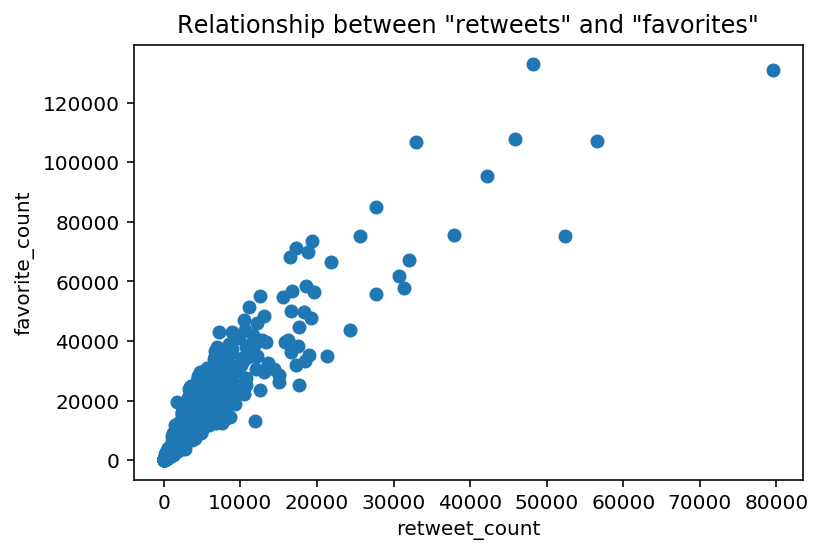

In [106]:
# Hypothetical equity returns

xData = dtd_b.retweet_count

yData = dtd_b.favorite_count

 

# Draw the scatter plot

plot.scatter(xData, yData)

plot.title('Relationship between "retweets" and "favorites"')

plot.xlabel('retweet_count')

plot.ylabel('favorite_count')

plot.savefig('retweets.png')